# Housing Price Prediction Case Study



## Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.



**This is Multiple Linear Regression problem.**

# 

 #### First we need to import some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Now we have to import dataset

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

#### Checking the Null values

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
(df == 0).sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             299
prefarea              0
furnishingstatus      0
dtype: int64

In [8]:
#pd.set_option('precision',2)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


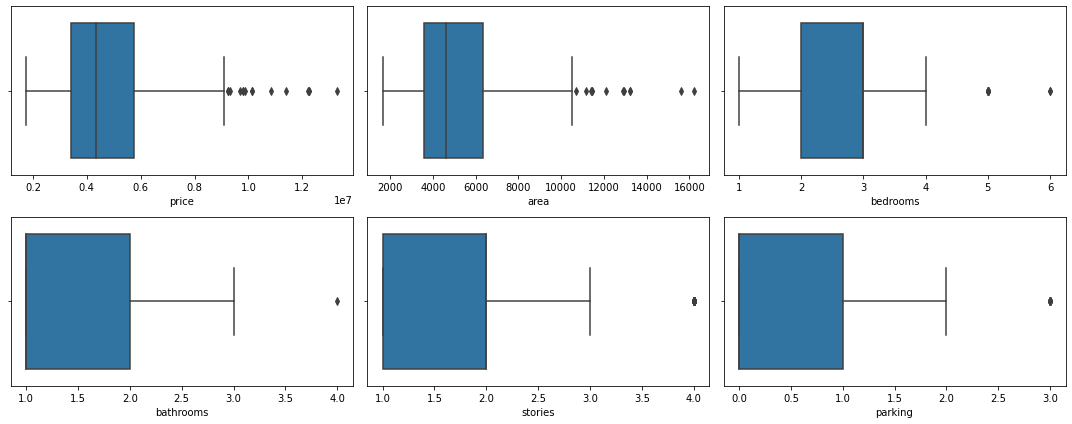

In [9]:
fig, axes =plt.subplots(2,3,figsize=(15,6))
fig1 = sns.boxplot(x = df['price'], ax = axes[0,0])
fig2 = sns.boxplot(x = df['area'], ax = axes[0,1])
fig3 = sns.boxplot(x = df['bedrooms'], ax = axes[0,2])
fig4 = sns.boxplot(x = df['bathrooms'], ax = axes[1,0])
fig5 = sns.boxplot(x = df['stories'], ax = axes[1,1])
fig6 = sns.boxplot(x = df['parking'], ax = axes[1,2])
plt.tight_layout()

In [10]:
#We have most outliers in price and area so we need 

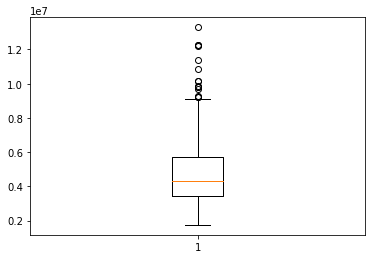

In [11]:
plt.boxplot(x = df['price'])
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR = q3 - q1
df=df[(df['price']>=q1-1.5*IQR) & (df['price']<=q3+1.5*IQR)]

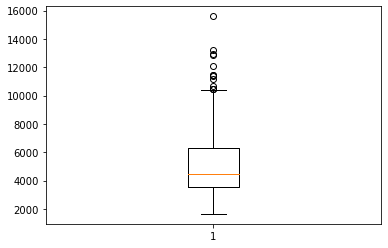

In [12]:
plt.boxplot(x = df['area'])
q1=df['area'].quantile(0.25)
q3=df['area'].quantile(0.75)
IQR = q3 - q1
df=df[(df['area']>=q1-1.5*IQR) & (df['area']<=q3+1.5*IQR)]

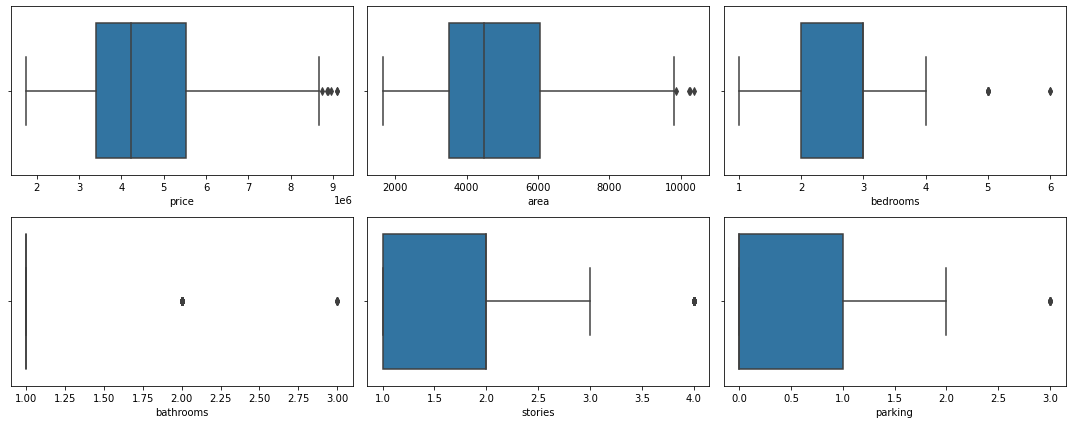

In [13]:
fig, axes =plt.subplots(2,3,figsize=(15,6))
fig1 = sns.boxplot(x = df['price'], ax = axes[0,0])
fig2 = sns.boxplot(x = df['area'], ax = axes[0,1])
fig3 = sns.boxplot(x = df['bedrooms'], ax = axes[0,2])
fig4 = sns.boxplot(x = df['bathrooms'], ax = axes[1,0])
fig5 = sns.boxplot(x = df['stories'], ax = axes[1,1])
fig6 = sns.boxplot(x = df['parking'], ax = axes[1,2])
plt.tight_layout()

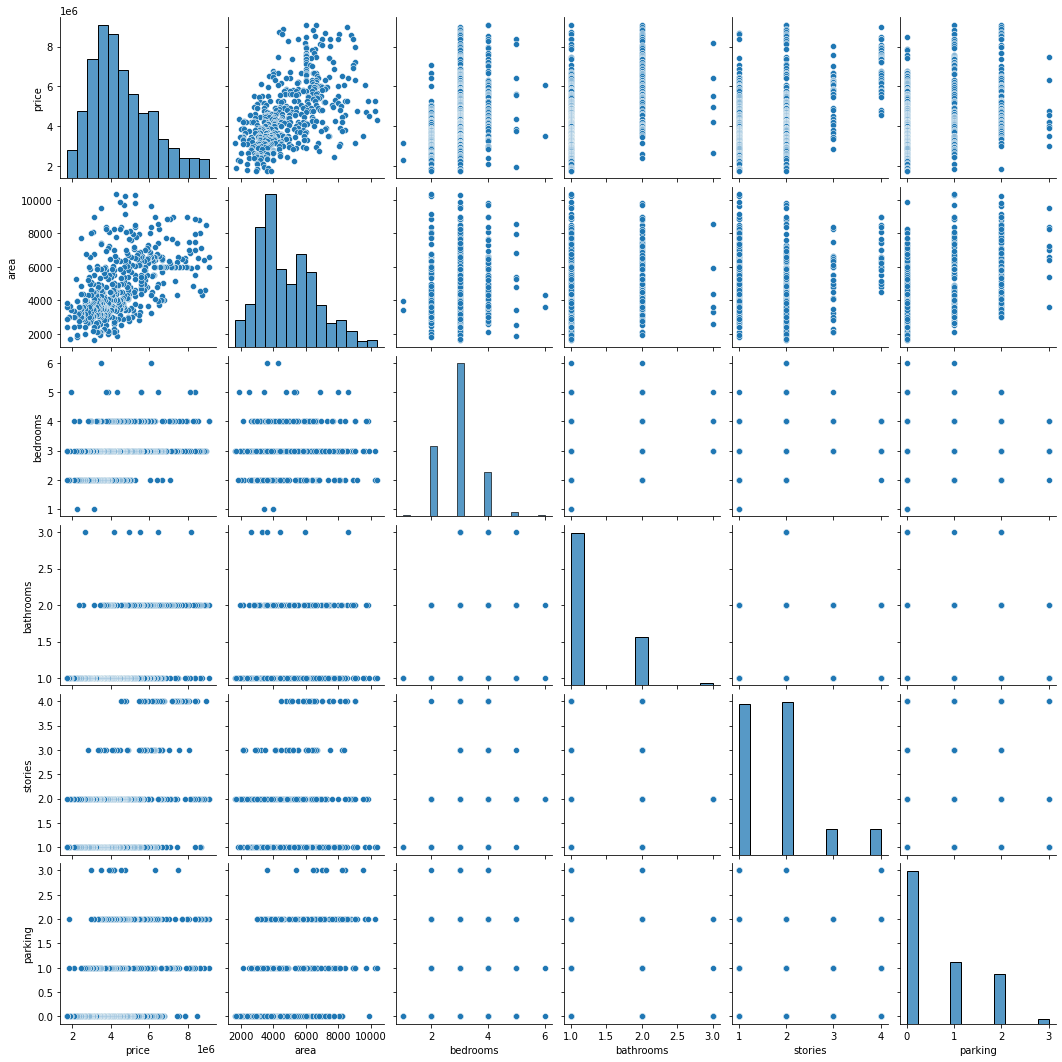

In [14]:
sns.pairplot(df)

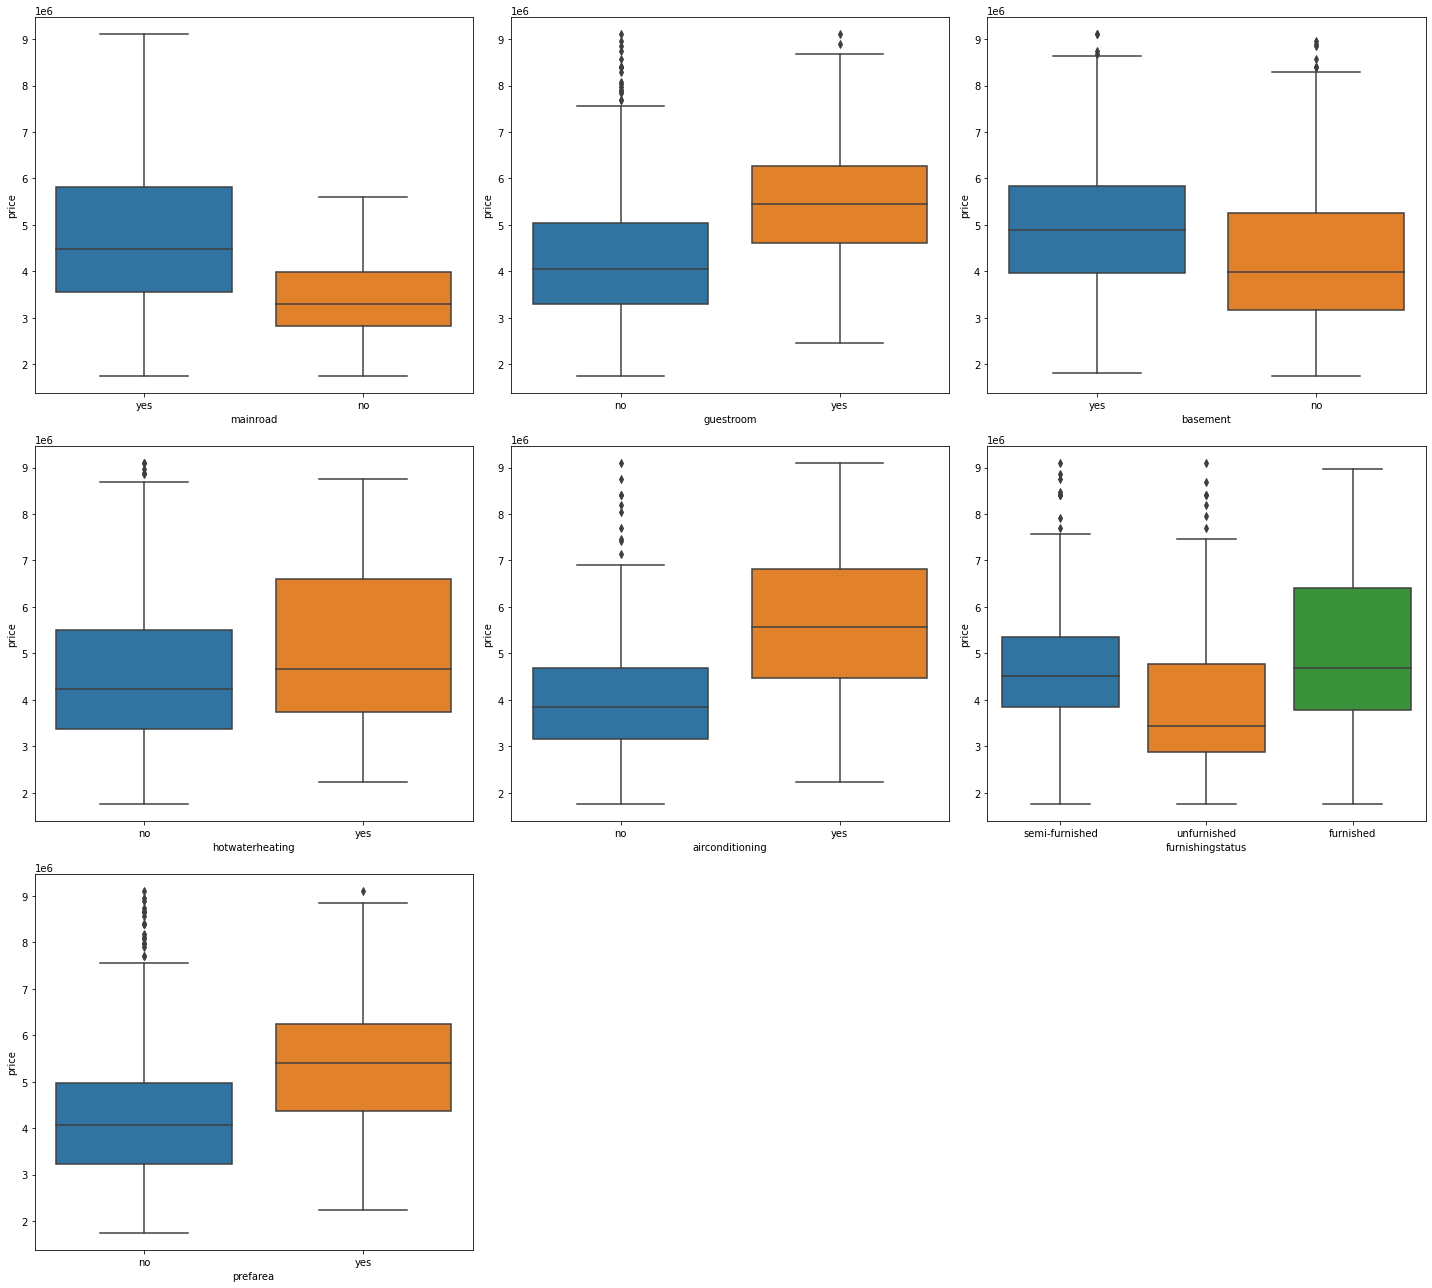

In [15]:
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'prefarea', y = 'price', data = df)
plt.tight_layout()
plt.show()

Our housing dataset has many columns with values as 'Yes' or 'No'. we would need numerical values and not string. So, we have to map 'yes' to 1 and 'no' to 2

In [16]:
# List of variables to map
lt=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def mapping(x):
    return x.map({'no':0,'yes':1})
df[lt]=df[lt].apply(mapping)

In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [18]:
df['furnishingstatus'].unique()

array(['semi-furnished', 'unfurnished', 'furnished'], dtype=object)

The column 'furnishingstatus' has three variables. So, We need to convert these variables into integer. For this, we will use '.get_dummies' to get dummy variables.

In [19]:
status=pd.get_dummies(df['furnishingstatus'])
status

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [20]:
status=pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [21]:
status

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [22]:
df=pd.concat([df,status],axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


Now, we don't need three columns. we can drop the 'furnished' column, as the type of furnishing can be identified with just the last two columns where —

- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to semi-furnished

In [23]:
# Drop 'furnishingstatus' as we have created the dummies for it
df.drop(['furnishingstatus'],axis=1,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [24]:
# Now Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test=train_test_split(df,train_size=0.8,test_size=0.20,random_state=100)

### Rescaling the Features
As we know that in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)


This time, we will use MinMax scaling.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
lt1=['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[lt1]=scaler.fit_transform(df_train[lt1])

df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
440,0.201905,0.224018,0.6,0.0,0.333333,1,0,1,0,0,0.000000,0,0,1
359,0.266667,0.219400,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
451,0.190476,0.583141,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,0
415,0.223810,0.356236,0.4,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0
177,0.475238,0.502309,0.4,0.0,0.000000,1,0,1,0,0,0.000000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.371429,0.483256,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0,0,1
307,0.328571,0.274827,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
72,0.676190,0.383372,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,0,1
377,0.257143,0.132794,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1,0,1


In [28]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,413.0,0.380071,0.213500,0.0,0.227619,0.333333,0.514286,1.0
area,413.0,0.360160,0.200796,0.0,0.207852,0.306236,0.496536,1.0
bedrooms,413.0,0.387893,0.149915,0.0,0.200000,0.400000,0.400000,1.0
bathrooms,413.0,0.128329,0.229492,0.0,0.000000,0.000000,0.000000,1.0
stories,413.0,0.259080,0.280384,0.0,0.000000,0.333333,0.333333,1.0
mainroad,413.0,0.871671,0.334862,0.0,1.000000,1.000000,1.000000,1.0
guestroom,413.0,0.162228,0.369107,0.0,0.000000,0.000000,0.000000,1.0
basement,413.0,0.351090,0.477890,0.0,0.000000,0.000000,1.000000,1.0
hotwaterheating,413.0,0.046005,0.209750,0.0,0.000000,0.000000,0.000000,1.0
airconditioning,413.0,0.292978,0.455681,0.0,0.000000,0.000000,1.000000,1.0


<AxesSubplot:>

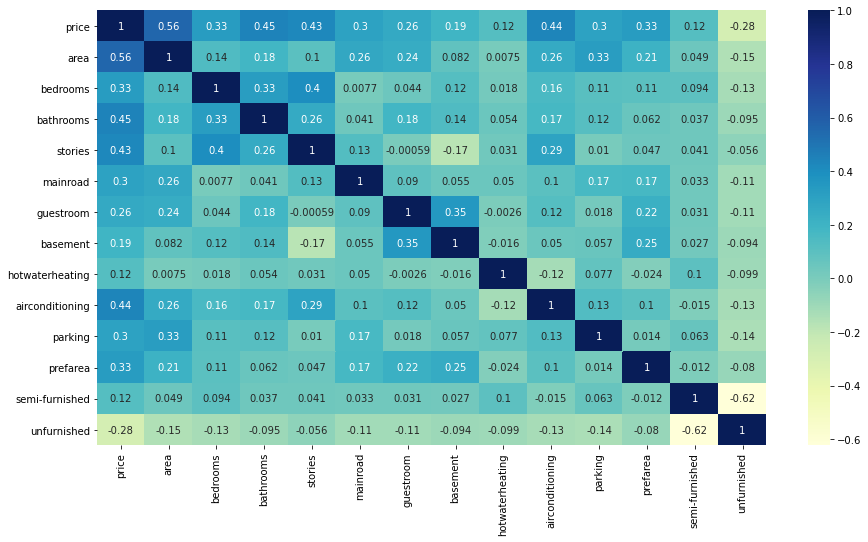

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

In [30]:
y_train=df_train.pop('price')
x_train=df_train

### Model Building

In [31]:
#importing RFE(Recursive feature elimination) and Linear Regression.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
#running RFE with output number of variable equl to 10
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [33]:
# Running RFE
rfe=RFE(lm,6)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [34]:
list(zip(x_train,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 4),
 ('guestroom', False, 7),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [35]:
col=x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [36]:
x_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# creating x_train data frame with RFE selected variable
x_train_rfe=x_train[col]

In [38]:
import statsmodels.api as sm
# Adding a constant variable
x_train_rfe=sm.add_constant(x_train_rfe)

In [39]:
# Runnig the linear model
slm=sm.OLS(y_train, x_train_rfe).fit()

In [40]:
print(slm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           2.86e-81
Time:                        20:56:03   Log-Likelihood:                 250.00
No. Observations:                 413   AIC:                            -486.0
Df Residuals:                     406   BIC:                            -457.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0944      0.014     

In [41]:
# calculate VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending =False)


In [43]:
vif

,Features,VIF
0,const,4.83
5,airconditioning,1.19
3,stories,1.15
1,area,1.14
2,bathrooms,1.11
6,prefarea,1.05
4,hotwaterheating,1.02


### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

In [44]:
y_train_pred=slm.predict(x_train_rfe)

In [45]:
res = (y_train_pred - y_train)

Text(0.5, 0, 'Errors')

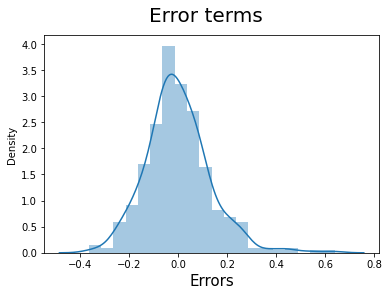

In [46]:
# Plot the histogram of error terms
sns.distplot((y_train - y_train_pred) ,bins = 20)
plt.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)

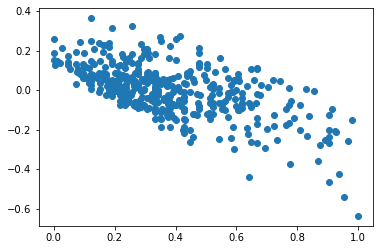

In [47]:
plt.scatter(y_train,res)

from scatter plot we can conclude that the linear regression is not a right model to be used for this dataset

In [48]:
# There may be some relation in the error terms.

## Model Evaluation

**Now we have to scale our test data**

In [49]:
lt2=['area' , 'bedrooms', 'bathrooms', 'stories', 'airconditioning','prefarea', 'parking','price']
df_test[lt2]=scaler.fit_transform(df_test[lt2]) 
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
244,0.368932,0.427241,0.333333,0.0,0.333333,1,1,1,0,0.0,0.000000,1.0,1,0
287,0.320388,0.448196,0.333333,0.0,0.333333,1,0,0,0,1.0,0.000000,0.0,0,1
166,0.475728,0.715949,0.333333,0.0,0.000000,1,0,1,0,1.0,0.666667,1.0,0,1
176,0.466019,0.799767,0.333333,0.0,0.000000,1,0,0,0,1.0,0.666667,0.0,0,0
282,0.330097,0.061118,0.333333,0.0,0.333333,0,1,1,0,1.0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.655340,0.273574,0.333333,0.5,0.333333,1,0,1,0,1.0,0.333333,0.0,1,0
22,0.936893,0.745052,0.333333,0.0,0.000000,1,1,1,0,1.0,0.333333,0.0,0,0
218,0.407767,0.368452,0.000000,0.0,0.000000,1,0,0,0,1.0,0.000000,1.0,1,0
240,0.373786,0.254948,0.333333,0.0,0.333333,1,0,0,0,0.0,0.333333,1.0,1,0


In [50]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
price,104.0,0.385511,0.235351,0.0,0.202913,0.351942,0.519417,1.0
area,104.0,0.410077,0.222780,0.0,0.243015,0.383003,0.558353,1.0
bedrooms,104.0,0.317308,0.219737,0.0,0.333333,0.333333,0.333333,1.0
bathrooms,104.0,0.139423,0.245906,0.0,0.000000,0.000000,0.500000,1.0
stories,104.0,0.288462,0.318633,0.0,0.000000,0.333333,0.333333,1.0
mainroad,104.0,0.769231,0.423365,0.0,1.000000,1.000000,1.000000,1.0
guestroom,104.0,0.240385,0.429386,0.0,0.000000,0.000000,0.000000,1.0
basement,104.0,0.326923,0.471361,0.0,0.000000,0.000000,1.000000,1.0
hotwaterheating,104.0,0.028846,0.168185,0.0,0.000000,0.000000,0.000000,1.0
airconditioning,104.0,0.365385,0.483870,0.0,0.000000,0.000000,1.000000,1.0


In [51]:
y_test=df_test.pop('price')
x_test=df_test

In [52]:
# add constant in test data
x_test = sm.add_constant(x_test)

In [53]:
# Now we use our model to make predictions.

In [54]:
x_test_rfe=x_test[x_train_rfe.columns]

In [55]:
# making predictions
y_pred = slm.predict(x_test_rfe)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test, y_pred)

0.5268104889039339

Text(0.5, 0, 'y_test')

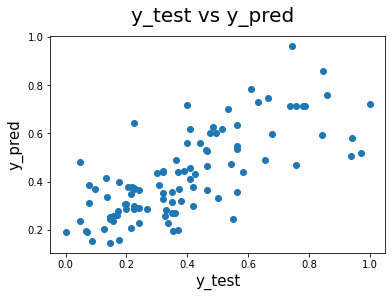

In [58]:
plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)
plt.ylabel('y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=15)

# 

We can see that the equation of our best fitted line is:

**price = 0.4147&#x00D7;area + 0.2383&#x00D7;bathrooms + 0.1867&#x00D7;stories + 0.1273&#x00D7;hotwaterheating + 0.1026&#x00D7;airconditioning + 0.1066&#x00D7;prefarea + 0.0944&#x00D7;const**